In [12]:
import os
# read image
from scipy.misc import imread
from scipy.misc import imresize
import numpy as np

# for shuffling data batches
from sklearn.utils import shuffle

# plotting pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import colors # making colors consistent
from mpl_toolkits.axes_grid1 import make_axes_locatable # colorbar helper

In [10]:
# helper to add an image to the plot and choose whether
# to include the color bar
def implot(mp, ax, SHOW_CB=False):
    cmap = plt.get_cmap('viridis')
    # bounds=[-4,0,4]
    bounds=np.linspace(-0.01, 1, 80)
    norm = colors.BoundaryNorm(bounds, cmap.N)

    # tell imshow about color map so that only set colors are used
    im = ax.imshow(mp, interpolation='nearest', origin='lower',
                        cmap=cmap, norm=norm)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    if SHOW_CB:
        if np.min(mp) != np.max(mp):
            cbar = plt.colorbar(im, cax=cax, format='%1.2f', boundaries=bounds)
        else:
            cax.set_axis_off()
    else:
        cax.set_axis_off()

    ax.set_axis_off()

def show_masked_result(image, mask):
    # create combined image of (image & mask)
    combined = np.copy(img)
    combined[mask == 0] = [0, 0, 0]

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))

    implot(image, ax1)
    implot(mask, ax2, True)
    implot(combined, ax3)

    plt.grid('off')
    plt.tight_layout()
    plt.show()

In [5]:
# image dimensions (GLOBAL) - [MG_WIDTH x IMG_HEIGHT, CHANNELS]
SQUARE_DIM = 224
if SQUARE_DIM:
    IMG_WIDTH = SQUARE_DIM
    IMG_HEIGHT = SQUARE_DIM
CHANNELS = 3

ROOT_DIR = "./numpy_prep/" + str(SQUARE_DIM) + "_" + str(SQUARE_DIM)

# load entire dataset into memory
# NOTE: depending on your machine, this may not be practical, you may have to
# create a smaller dataset (although this should have already been noticed when
# making this dataset)
X_dev = np.load(ROOT_DIR + '/images.npy')
y_dev = np.load(ROOT_DIR + '/masks.npy')

# shuffle set -- not necessary, but I like to do this in case there
# is some order to the data we don't know about.  Not that important
# for this particular problem (segmentation), but I still feel better
# calling a shuffle before splitting the data
X_dev, y_dev = shuffle(X_dev, y_dev, random_state=42)
print("X:{} , y:{}".format(X_dev.shape, y_dev.shape))

X:(2000, 224, 224, 3) , y:(2000, 224, 224)


In [6]:
# preprocess mask (example shown in other notebook - TODO)
# threshold (clip) to [0, 1] where 0:no mask, 1:mask
# convert to datatype int
y_dev = [np.clip(img, 0, 1).astype(np.int32) for img in y_dev]
y_dev = np.asarray(y_dev)

In [7]:
# preprocess image (example shown in other notebook - TODO)
X_dev = [(image-np.amin(image))/(np.amax(image)-np.amin(image)) for image in X_dev]
X_dev = np.asarray(X_dev)

#### Split into training and validation

In [8]:
# here we'll use 10% for validation (85% training)
split_thresh = int(X_dev.shape[0] * 0.85)
X_train = X_dev[:split_thresh]
y_train = y_dev[:split_thresh]
X_val = X_dev[split_thresh:]
y_val = y_dev[split_thresh:]

print("Training   :  X:{} , y:{}".format(X_train.shape, y_train.shape))
print("Validation :  X:{}  , y:{}".format(X_val.shape, y_val.shape))

Training   :  X:(1700, 224, 224, 3) , y:(1700, 224, 224)
Validation :  X:(300, 224, 224, 3)  , y:(300, 224, 224)


/home/jack/anaconda3/envs/dl_cpu/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


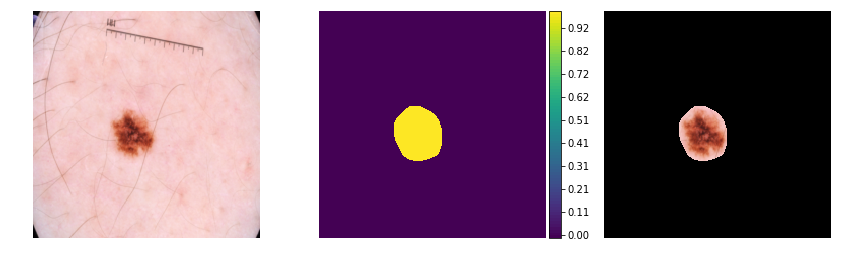

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


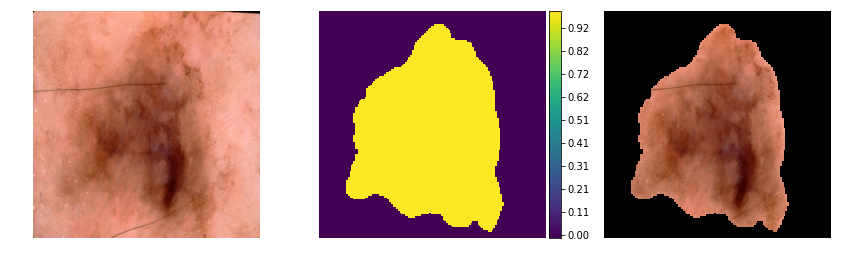

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


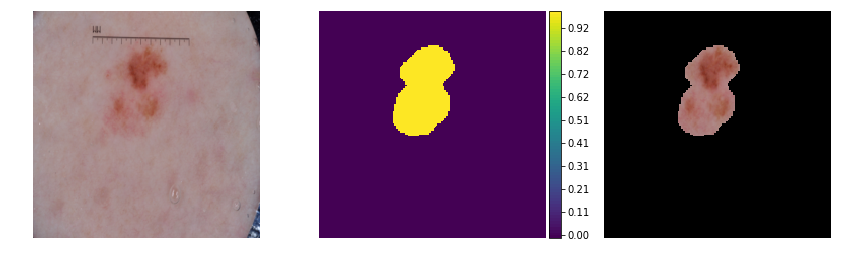

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
for i in range(3):
    img = X_train[i,:,:]
    mask = y_train[i,:,:]
    show_masked_result(img, mask)
    print(mask)

In [ ]:
## save image
np.save('./numpy_final/' + str(SQUARE_DIM) + "_" + str(SQUARE_DIM) +  '/train.npy', X_train)
np.save('./numpy_final/' + str(SQUARE_DIM) + "_" + str(SQUARE_DIM) + '/train_masks.npy', y_train)
# val
np.save('./numpy_final/' + str(SQUARE_DIM) + "_" + str(SQUARE_DIM) +  '/validation.npy', X_val)
np.save('./numpy_final/' + str(SQUARE_DIM) + "_" + str(SQUARE_DIM) + '/validation_masks.npy', y_val)